<a href="https://colab.research.google.com/github/Sidharth-NK/ML_PROJECTS/blob/main/Logistic_Regression_manual_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=2, random_state=42)
y = y.reshape(-1, 1)  # Convert y into a column vector

In [3]:
# Normalize features
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - u) / std

X = normalize(X)

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Add bias column (extra column of ones)
def addExtraColumn(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

X_train = addExtraColumn(X_train)
X_test = addExtraColumn(X_test)


In [6]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# Hypothesis Function
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))


In [8]:
# Binary Cross-Entropy Loss
def error(y, yp):
    return np.mean(-y * np.log(yp) - (1 - y) * np.log(1 - yp))


In [9]:
# Compute Gradient
def gradient(X, y, yp):
    m = X.shape[0]
    return (-1/m) * np.dot(X.T, (y - yp))


In [10]:
# Train Model using Gradient Descent
def train(X, y, max_iters=100, learning_rate=0.1):
    theta = np.random.randn(X.shape[1], 1)  # Initialize theta
    error_list = []

    for i in range(max_iters):
        yp = hypothesis(X, theta)
        e = error(y, yp)
        error_list.append(e)
        grad = gradient(X, y, yp)
        theta -= learning_rate * grad  # Update theta

    plt.plot(error_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

    return theta

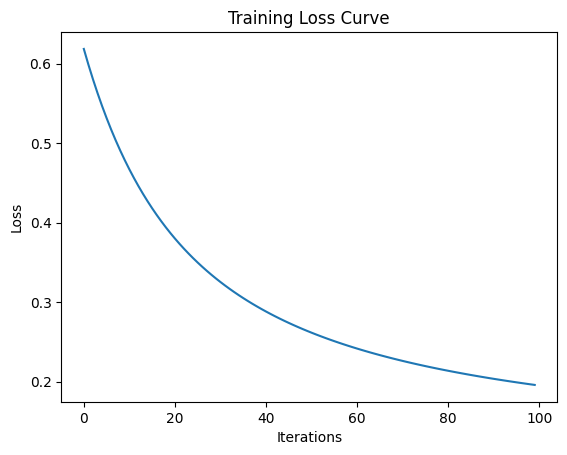

In [11]:
# Train the logistic regression model
theta = train(X_train, y_train)


In [12]:
# Predictions
def predict(X, theta):
    return (hypothesis(X, theta) >= 0.5).astype(int)

In [13]:
# Evaluate Model
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 93.40%
